# Kaggle: Michael Jordan, Kobe Bryant and Lebron James stats

## 1. Introducción

Para este proyecto se utilizaran diferentes bases de datos que proporcionan información sobre todas las estadisticas de tres de los mejores jugadores de la historia del baloncesto: Michael Jordan, Kobe Bryant y Lebron James.

Los datasets utilizados para este proyecto serán:

    1. allgames_stats.csv: BD que proporciona las estadísticas de todos los partidos de los 3 jugadores
    2. per_game_stats.csv: BD que proporciona las estadísticas medias de cada temporada de los 3 jugadores
    3. 
    

## 2. Objetivos

Los objetivos de este proyecto serán dos. Por una banda, realizar un analisis de los datos del dataset donde se encuentran las estadisticas de cada jugador por temporada y de este modo extraer conclusiones. Por otra banda, realizar la predicción de un atributo tomandolo como el "target" del problema, es decir, realizar un problema de regresión logística o linear.

De esta forma el objetivo principal de este proyecto será contestar las siguientes 2 preguntas:
    
    1. ¿Quién es estadisticamente el mejor jugador de los tres? -> Analisis de datos
    2. ¿Cuál será el resultado de un partido? -> Predicción de atributo categórico (Regresión logística)
    
#preguntar que atributo es mejor predecir si regresion logistica (victoria o derrota) o regresion linear (salarios o puntos en un partido por ejemplo)

## 3. Exploratory Data Analysis

### 3.1. Imports y primeras visualizaciones

Antes de comenzar, realizaremos los imports de todas las librerias necesárias para realizar esta practica y cargaremos los datos de los datasets que utilizaremos 

In [1]:
from sklearn.datasets import make_regression
import numpy as np
import pandas as pd
%matplotlib inline
from matplotlib import pyplot as plt
import scipy.stats
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn import preprocessing
import sklearn
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from statistics import mean
from sklearn import svm 
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import f1_score
import warnings 
warnings.filterwarnings('ignore')

def load_dataset(path):
    dataset = pd.read_csv(path, header=0, delimiter=',')
    return dataset

# carreguem dataset 

dataset_per_game_stats = load_dataset('datasets/per_game_stats.csv')
data_per_game_stats = dataset_per_game_stats.values

dataset_allgames_stats = load_dataset('datasets/allgames_stats.csv')
data_allgames_stats = dataset_allgames_stats.values

Realizaremos una primera visualización de los datos para conocer la dimensión y el número de atributos con los que operaremos

In [2]:
print("Dataset per_game_stats")
dataset_per_game_stats.head()

Dataset per_game_stats


,Season,Age,Tm,Lg,Pos,G,GS,MP,FG,FGA,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Player,RSorPO
0,2003-04,19,CLE,NBA,SG,79,79,39.5,7.9,18.9,...,4.2,5.5,5.9,1.6,0.7,3.5,1.9,20.9,Lebron James,Regular Season
1,2004-05,20,CLE,NBA,SF,80,80,42.4,9.9,21.1,...,6.0,7.4,7.2,2.2,0.7,3.3,1.8,27.2,Lebron James,Regular Season
2,2005-06,21,CLE,NBA,SF,79,79,42.5,11.1,23.1,...,6.1,7.0,6.6,1.6,0.8,3.3,2.3,31.4,Lebron James,Regular Season
3,2006-07,22,CLE,NBA,SF,78,78,40.9,9.9,20.8,...,5.7,6.7,6.0,1.6,0.7,3.2,2.2,27.3,Lebron James,Regular Season
4,2007-08,23,CLE,NBA,SF,75,74,40.4,10.6,21.9,...,6.1,7.9,7.2,1.8,1.1,3.4,2.2,30.0,Lebron James,Regular Season


In [3]:
print("Dataset allgames_stats")
dataset_allgames_stats.head()

Dataset allgames_stats


,G,Date,Tm,X,Opp,Result,GS,MP,FG,FGA,...,TRB,AST,STL,BLK,TOV,PF,PTS,GmSc,Player,RSorPO
0,1,1996-11-03,LAL,NaN,MIN,W,0,6:00,0.0,1.0,...,1,0,0.0,1.0,1,1,0.0,-1.1,Kobe Bryant,Regular Season
1,2,1996-11-05,LAL,@,NYK,W,0,3:00,0.0,1.0,...,0,0,0.0,0.0,1,0,1.0,-1.1,Kobe Bryant,Regular Season
2,3,1996-11-06,LAL,@,CHH,L,0,7:00,2.0,3.0,...,0,0,0.0,0.0,3,0,5.0,0.7,Kobe Bryant,Regular Season
3,4,1996-11-08,LAL,@,TOR,L,0,17:00,3.0,8.0,...,3,0,0.0,1.0,0,3,10.0,5.2,Kobe Bryant,Regular Season
4,5,1996-11-10,LAL,NaN,ATL,W,0,8:00,0.0,3.0,...,3,1,0.0,0.0,0,0,2.0,1.9,Kobe Bryant,Regular Season


In [4]:
print("Dataset per_game_stats")
print("Dimensión base de datos: ", dataset_per_game_stats.shape)
print("Número de atributos: ", dataset_per_game_stats.columns.size)
print(" ")
print("Dataset allgames_stats")
print("Dimensión base de datos: ", dataset_allgames_stats.shape)
print("Número de atributos: ", dataset_allgames_stats.columns.size)

Dataset per_game_stats
Dimensión base de datos:  (92, 32)
Número de atributos:  32
 
Dataset allgames_stats
Dimensión base de datos:  (4254, 29)
Número de atributos:  29


**Dataset per_game_stats.csv**
Este dataset contiene las estadisticas y datos medios por temporada de cada uno de los tres jugadores. Como podemos observar, está formado por un total de 92 muestras y 32 atributos diferentes.

**Dataset allgames_stats.csv**
Este dataset contiene las estadisticas y datos de todos los partidos jugados de los 3 jugadores. Por ese mismo motivo el dataset está formado por un total de 4254 muestras y 29 atributos diferentes. 

### 3.2. Tipos de datos y seleccion de atributo target

A continuación comprobaremos el tipo de datos que contienen nuestros dataset

In [9]:
print("Dataset per_game_stats")
dataset_per_game_stats.dtypes

Dataset per_game_stats


Season     object
Age         int64
Tm         object
Lg         object
Pos        object
G           int64
GS          int64
MP        float64
FG        float64
FGA       float64
FG%       float64
3P        float64
3PA       float64
3P%       float64
2P        float64
2PA       float64
2P%       float64
eFG%      float64
FT        float64
FTA       float64
FT%       float64
ORB       float64
DRB       float64
TRB       float64
AST       float64
STL       float64
BLK       float64
TOV       float64
PF        float64
PTS       float64
Player     object
RSorPO     object
dtype: object

Para este dataset podemos que la mayoria de atributos son de tipo númerico ya que se tratan de atributos estadisticos sobre la temporada como podrian ser los puntos, rebotes, asistencias, etc. Tambien existen una serie de atributos de tipo string como podrian ser el nombre, la temporada, etc.

Estos atributos no numéricos seran tratados más adelante en el apartado de "Preprocessing", de igual modo también será necessario eliminar atributos númericos no necessarios en dicho apartado para realizar el problema ya que una base de datos con muchos atributos podria afectar a la hora de realizar predicciones. 

El atributo **target** a predecir para esta base de datos serán los **puntos medios por temporada**, por lo tanto será tratado como un problema de regresión lineal.

In [24]:
print("Dataset allgames_stats")
dataset_allgames_stats.dtypes

Dataset allgames_stats


G           int64
Date       object
Tm         object
X          object
Opp        object
Result     object
GS          int64
MP         object
FG        float64
FGA       float64
FG%       float64
3P          int64
3PA         int64
3P%       float64
FT        float64
FTA       float64
FT%       float64
ORB       float64
DRB       float64
TRB         int64
AST         int64
STL       float64
BLK       float64
TOV         int64
PF          int64
PTS       float64
GmSc      float64
Player     object
RSorPO     object
dtype: object

De forma similar al dataset anterior, la mayoria de atributos que contiene este también son de tipo numerico ya que son los que hacen referencia a las estadisticas por partido. También existen una série de atributos de tipo no numerico como el jugador, el equipo, el rival, etc.

El atributo **target** a predecir para esta base de datos será el **resultado del partido (win or lose)**, por lo tanto, será tratado como un problema de regresión logística donde trataremos de predecir un atributo categórico.
Dicho atributo es string (W or L), por lo tanto será necesario realizar la siguiente transformación:
    
        - Clase 0: Lose (int 0)
        - Clase 1: Win  (int 1)


### 3.3. Corrección Atributos

Antes de realizar las matrices de correlación y visualizar la distribución de los atributos, es necesario realizar una serie de transformaciones para este ultimo dataset (allgames_stats.csv) ya que contiene atributos de tipo object (local, minutos jugados, resultado) los cuales son interesantes visualizar en la matriz de correlación y al ser de tipo object no quedarán representados. Por lo tanto, procedemos a realizar estas transformaciones. 

El atributo "X" hace referencia a si el jugador ha jugado el partido como local (valor nulo) o visitante (valor @), por lo tanto pararemos los valores nulos a 1 y los valores @ a 0

In [2]:
for i in range(dataset_allgames_stats.shape[0]):
    if dataset_allgames_stats["X"][i] == "@":
        dataset_allgames_stats["X"][i] = 0
    else:
        dataset_allgames_stats["X"][i] = 1
        
dataset_allgames_stats["X"] = pd.to_numeric(dataset_allgames_stats["X"])

Ahora procedemos a fijarnos en nuestro atributo "target" de este dataset el cual es "Results". Al ser de tipo object lo pasaremos a tipo int de la siguiente forma que se ha explicado anteriormente para poder operar con él.

In [3]:
for i in range(dataset_allgames_stats.shape[0]):
    if dataset_allgames_stats["Result"][i] == "L":
        dataset_allgames_stats["Result"][i] = 0
    elif dataset_allgames_stats["Result"][i] == "W":
        dataset_allgames_stats["Result"][i] = 1
        
dataset_allgames_stats["Result"] = pd.to_numeric(dataset_allgames_stats["Result"])

El atributo "MP" hace referéncia a los minutos jugados el cual también es de tipo object. Pasaremos los minutos de tipo object a tipo numerico

In [4]:
for i in range(dataset_allgames_stats.shape[0]):
    minuto = dataset_allgames_stats["MP"][i]
    m = ""
    for x in minuto:
        if x != ":":
            m = m + x
        else:
            dataset_allgames_stats["MP"][i] = int(m)
            break
dataset_allgames_stats["MP"] = pd.to_numeric(dataset_allgames_stats["MP"])

### 3.4. Matrices de correlación

Una vez ya tenemos los atributos que más nos pueden interesar corregidos, procedemos a realizar las matrices de correlación para visualizar la correlación de los atributos.

Matriz de correlación Dataset per_game_stats


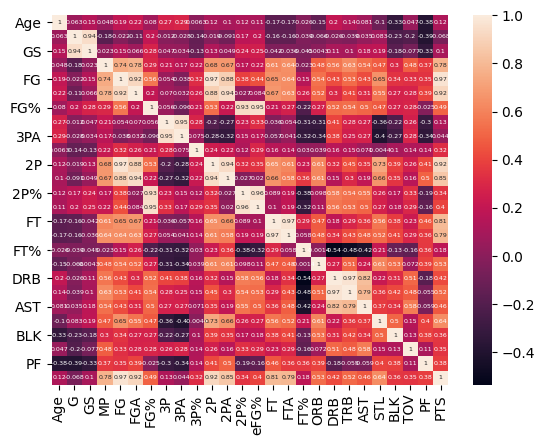

In [22]:
print("Matriz de correlación Dataset per_game_stats")
correlacio = dataset_per_game_stats.corr()
plt.figure()
ax = sns.heatmap(correlacio, annot=True, annot_kws={"size": 4.5})

Como se puede observar, los atributos para este dataset están bastante bien correlacionados entre si. Concretamente, nuestro atributo a predecir PTS (puntos medios por temporada) obtiene las correlacioenes más altas con los atributos FG (0.97), FGA (0.92), 2P (0.92), FTA (0.79), FT (0.51), 2PA (0.55) y STL (0.64) . 
Que hacen referéncia a:

    - FG: Media de canastas por partido
    - FGA: Media de intentos de canasta por partido
    - 2P: Media de canastas de 2 puntos por partido
    - 2PA: Media de intentos de canasta de 2 puntos por partido
    - FTA: Media de intentos de tiro libre por partido
    - FT: Media de canastas de tiro libre por partido
    - STL: Media de robos por partido

Matriz de correlación Dataset allgames_stats


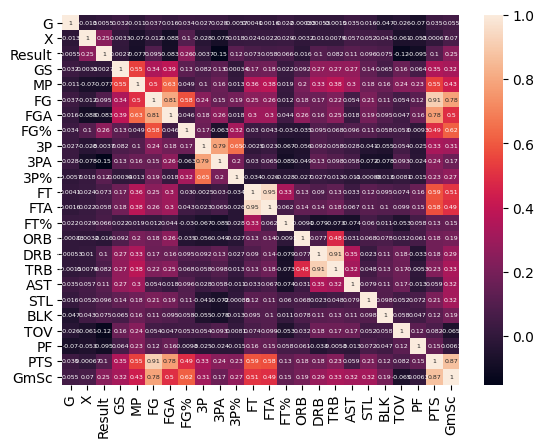

In [23]:
print("Matriz de correlación Dataset allgames_stats")
correlacio = dataset_allgames_stats.corr()
plt.figure()
ax = sns.heatmap(correlacio, annot=True, annot_kws={"size": 4.5})

A diferéncia del dataset anterior, en general los atributos de este están mucho menos correlacionados entre sí. Este echo no cambia para nuestro atributo target "Result" el cual obtiene una máxima correlación de 0.26 con el atributo "FG%" y unas correlaciones similares de 0.25 con los atributos "X" y "GmSc". Una relación baja puede afectar a la hora de realizar predicciones, concretamente afectará a la regresión logistica provocando malos resultados.

En principio, viendo como estan correalcionados los dos datasets podemos pensar que el problema de regresión lineal nos resultará mas sencillo que el problema de regresión logística a la hora de realizar las predicciones ya que sus atributos tienen una bastante mejor correlación. 

### 3.5. Distribución atributo target

Realizaremos un gráfico para visualizar la distribución del atributo target "Result" del dataset allgames_stats.csv y asi poder comprobar si esta balanceado.

In [5]:
target = pd.Index(dataset_allgames_stats['Result'])
target.value_counts()

1    2741
0    1513
Name: Result, dtype: int64

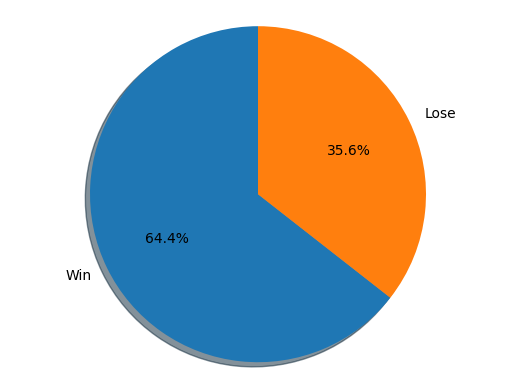

In [12]:
win = dataset_allgames_stats[dataset_allgames_stats.Result == 1]
lose = dataset_allgames_stats[dataset_allgames_stats.Result == 0]

fig,ax1 = plt.subplots()
labels = 'Win', 'Lose'
ax1.pie([win.shape[0],lose.shape[0]], labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
ax1.axis('equal')
plt.show()

Como se puede observar, el atributo no está nada balanceado ya que hay un 28,8% mas de muestras de partidos ganados que de partidos perdidos. Este echo era obvio ya que al estrar tratando con 3 de los mejores jugadores de baloncesto de la historia era de esperar que hubiera más muestras de partidos ganados que de partidos perdidos.

Este desbalanceo afectará directamente a la hora de realizar la clasificación del atributo.

### 3.6. ¿Quién es estadísticamente el mejor jugador? (Objetivo 1)

Una vez corregido los atributos y antes de continuar con el apartado de preprocesamiento de los datos que será necesario para realizar las predicciones me gustaria realizar un analisis de los datos con el objetivo de alcanzar el primer objetivo planteado en el proyecto:

¿Quién es estadísticamente el mejor jugador?

Para este apartado utilizaremos el dataset **per_game_stats.csv** que contiene las estadisticas medias de todas las temporadas de cada jugador. Primero separaremos los datos de cada jugador.

In [20]:
MJ = dataset_per_game_stats[dataset_per_game_stats.Player == "Michael Jordan"]
MJ_RS = MJ[MJ.RSorPO == "Regular Season"] 
MJ_PO = MJ[MJ.RSorPO == "Playoffs"] 

KB = dataset_per_game_stats[dataset_per_game_stats.Player == "Kobe Bryant"]
KB_RS = KB[KB.RSorPO == "Regular Season"] 
KB_PO = KB[KB.RSorPO == "Playoffs"] 

LB = dataset_per_game_stats[dataset_per_game_stats.Player == "Lebron James"]
LB_RS = LB[LB.RSorPO == "Regular Season"] 
LB_PO = LB[LB.RSorPO == "Playoffs"] 

Para poder responder a la pregunta, analizaremos de cada jugador las estadisticas más importantes o más relevantes de un jugador de baloncesto. Estas estadísticas son los **puntos, los rebotes y las asistencias**. 

Analizar unicamente estas estadísticas no es una métrica infalible para saber cual de los 3 es el mejor ya que existen muchas otras que tambien influyen para determinar si un jugador es estadisticamente bueno. Además, tampoco podemos estudiar el impacto que tienen sus acciones o dichas estadisticas en un partido pero si que nos servira para realizar una proximación de quien es el mejor.

(mirar tambien tiros de 3 / tiros para saber cual es el mejor tirador, etc)
(en conclusiones poner un histograma de los 3 estadiscticas juntas por jugador)

**Puntos por partido**

Primero realizaremos una primera visualización general de los puntos por partido de cada temporada para los 3 jugadores

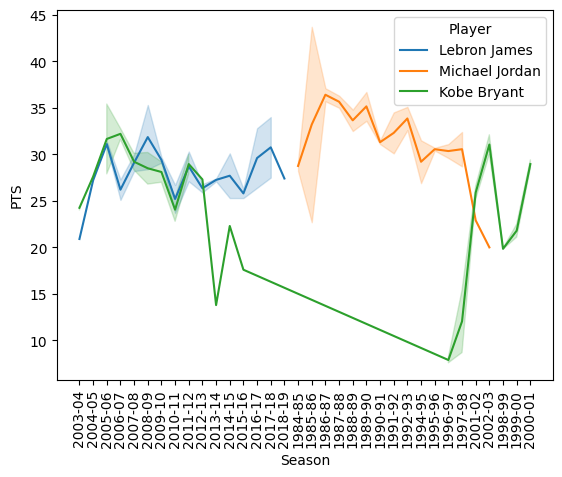

In [64]:
g = sns.lineplot(x=dataset_per_game_stats["Season"], y= dataset_per_game_stats["PTS"], color="red", hue = dataset_per_game_stats["Player"], sort=True)
g.tick_params(axis="x", rotation=90)

Seguidamente realizaremos una visualizción para cada uno de los jugadores 

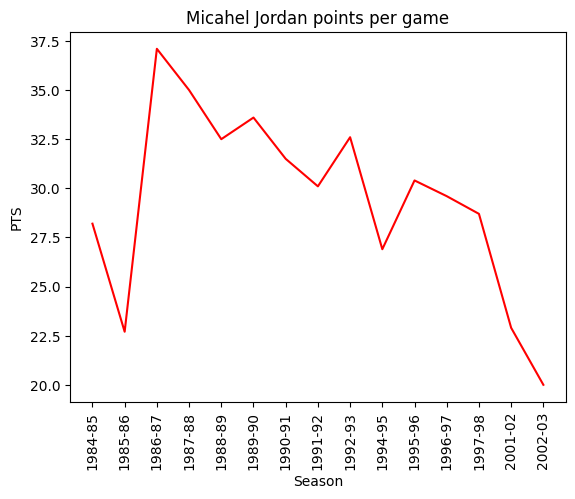

In [60]:
g = sns.lineplot(x=MJ_RS["Season"], y= MJ_RS["PTS"], color="red", sort=True)
g.tick_params(axis="x", rotation=90)
text = plt.title("Micahel Jordan points per game")

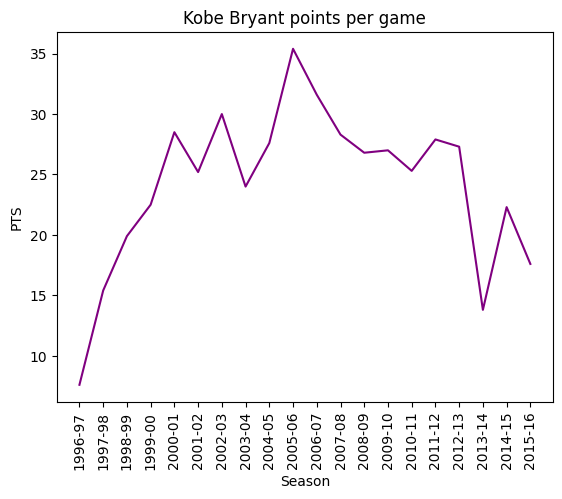

In [61]:
g = sns.lineplot(x=KB_RS["Season"], y= KB_RS["PTS"], color="purple", sort=True)
g.tick_params(axis="x", rotation=90)
text = plt.title("Kobe Bryant points per game")

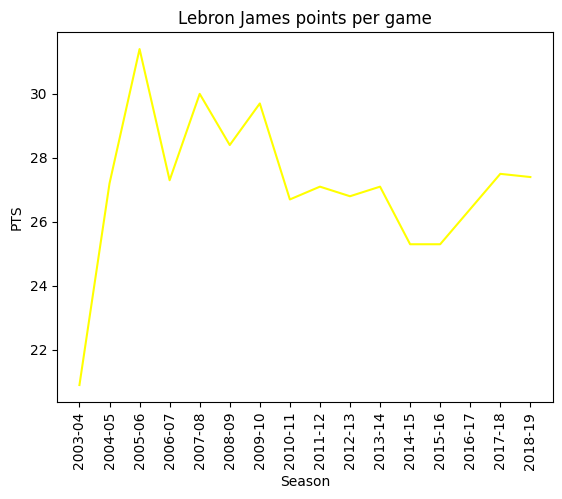

In [62]:
g = sns.lineplot(x=LB_RS["Season"], y= LB_RS["PTS"], color="yellow", sort=True)
g.tick_params(axis="x", rotation=90)
text = plt.title("Lebron James points per game")

In [66]:
MJ_RS.dtypes

Season     object
Age         int64
Tm         object
Lg         object
Pos        object
G           int64
GS          int64
MP        float64
FG        float64
FGA       float64
FG%       float64
3P        float64
3PA       float64
3P%       float64
2P        float64
2PA       float64
2P%       float64
eFG%      float64
FT        float64
FTA       float64
FT%       float64
ORB       float64
DRB       float64
TRB       float64
AST       float64
STL       float64
BLK       float64
TOV       float64
PF        float64
PTS       float64
Player     object
RSorPO     object
dtype: object

## 4. Preprocessing 

En este apartado trataremos los datos. Es decir, normalizaremos y eliminaremos outliers y atributos innecesarios antes de realizar las predicciones.

### 4.1. Tratamiento de valores nulos

Primero miraremos si nuestros datasets tienen muchos datos sin información

In [13]:
print("Dataset per_game_stats")
dataset_per_game_stats.isnull().sum()

Dataset per_game_stats


Season    0
Age       0
Tm        0
Lg        0
Pos       0
G         0
GS        0
MP        0
FG        0
FGA       0
FG%       0
3P        0
3PA       0
3P%       0
2P        0
2PA       0
2P%       0
eFG%      0
FT        0
FTA       0
FT%       0
ORB       0
DRB       0
TRB       0
AST       0
STL       0
BLK       0
TOV       0
PF        0
PTS       0
Player    0
RSorPO    0
dtype: int64

Como podemos observar para este dataset no existe ninguna celda con datos vacios

In [14]:
print("Dataset allgames_stats")
dataset_allgames_stats.isnull().sum()

Dataset allgames_stats


G           0
Date        0
Tm          0
X           0
Opp         0
Result      0
GS          0
MP          0
FG          4
FGA         7
FG%        17
3P          0
3PA         0
3P%       504
FT          1
FTA         2
FT%       135
ORB         1
DRB         2
TRB         0
AST         0
STL        11
BLK         1
TOV         0
PF          0
PTS         9
GmSc      219
Player      0
RSorPO      0
dtype: int64

En canvio, para este dataset encontramos una serie de atributos que sí se encuentran vacios. Por lo tanto, es necesario una serie de transformaciones. 

Para el resto de atributos, he decidido eliminar las muestras que contienen atributos nulos de menor cantidad. En canvio, para las muestras que contienen los atributos de mayor cantidad de valores nulos sustituiré esos valores nulos por la media.

In [15]:
dataset_allgames_stats["FG"].fillna(value=999, inplace=True)
dataset_allgames_stats["FGA"].fillna(value=999, inplace=True)
dataset_allgames_stats["FT"].fillna(value=999, inplace=True)
dataset_allgames_stats["FTA"].fillna(value=999, inplace=True)
dataset_allgames_stats["ORB"].fillna(value=999, inplace=True)
dataset_allgames_stats["DRB"].fillna(value=999, inplace=True)
dataset_allgames_stats["BLK"].fillna(value=999, inplace=True)
dataset_allgames_stats["PTS"].fillna(value=999, inplace=True)

filasElim = []
for i in range(dataset_allgames_stats.shape[0]):
    for x in dataset_allgames_stats.columns:
        if dataset_allgames_stats[x][i] == 999:
            filasElim.append(i)
dataset_allgames_stats = dataset_allgames_stats.drop(filasElim)

dataset_allgames_stats["FG%"].fillna(value=dataset_allgames_stats["FG%"].median(),inplace=True)
dataset_allgames_stats["3P%"].fillna(value=dataset_allgames_stats["3P%"].median(), inplace=True)
dataset_allgames_stats["FT%"].fillna(value=dataset_allgames_stats["FT%"].median(), inplace=True)
dataset_allgames_stats["STL"].fillna(value=dataset_allgames_stats["STL"].median(), inplace=True)
dataset_allgames_stats["GmSc"].fillna(value=dataset_allgames_stats["GmSc"].median(), inplace=True)

### 4.2. Eliminación de atributos

Para los dos datasets hay una serie de atributos que por diferentes motivos no nos serán utiles, ya sea porque contienen datos de poca utilidad o porque son strings que unicamente nos servirian para analizar o visualizar datos en forma de histogramas pero no para hacer las predicciones. 

Por lo tanto, eliminaremos aquellos atributos que no nos vayan a ser utiles. 

**per_game_stats.csv:**

Para este dataset eliminaremos los atributos que no nos seran útiles a la hora de hacer las predicciones. Estos serán: Season, Tm, Lg, Pos, G, GS y RSorPO

In [18]:
dataset_per_game_statsPR = dataset_per_game_stats.drop(["Season", "Tm", "Lg", "Pos", "G", "GS", "RSorPO"], axis=1)

**allgames_stats.csv**

Para este dataset eliminaremos los atributos que no nos seran útiles a la hora de hacer las predicciones. Estos serán: G, Date, Tm, Opp, GS y RSorPO

In [21]:
dataset_allgames_statsPR = dataset_allgames_stats.drop(["G", "Date", "Tm", "Opp", "GS", "RSorPO"], axis=1)

In [22]:
dataset_allgames_stats.head()

,X,Result,MP,FG,FGA,FG%,3P,3PA,3P%,FT,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,GmSc,Player
0,1,1,6,0.0,1.0,0.00,0,0,0.29,0.0,...,1.0,1,0,0.0,1.0,1,1,0.0,-1.1,Kobe Bryant
1,0,1,3,0.0,1.0,0.00,0,0,0.29,1.0,...,0.0,0,0,0.0,0.0,1,0,1.0,-1.1,Kobe Bryant
2,0,0,7,2.0,3.0,0.67,1,2,0.50,0.0,...,0.0,0,0,0.0,0.0,3,0,5.0,0.7,Kobe Bryant
3,0,0,17,3.0,8.0,0.38,2,3,0.67,2.0,...,3.0,3,0,0.0,1.0,0,3,10.0,5.2,Kobe Bryant
4,1,1,8,0.0,3.0,0.00,0,0,0.29,2.0,...,2.0,3,1,0.0,0.0,0,0,2.0,1.9,Kobe Bryant


## 5. Objetivo 1: ¿Quién es estadisticamente el mejor jugador?

In [2]:
dataset[dataset.Player == "Kobe Bryant"]

,Season,Age,Tm,Lg,Pos,G,GS,MP,FG,FGA,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Player,RSorPO
57,1996-97,18,LAL,NBA,SG,71,6,15.5,2.5,5.9,...,1.2,1.9,1.3,0.7,0.3,1.6,1.4,7.6,Kobe Bryant,Regular Season
58,1997-98,19,LAL,NBA,SG,79,1,26.0,4.9,11.6,...,2.1,3.1,2.5,0.9,0.5,2.0,2.3,15.4,Kobe Bryant,Regular Season
59,1998-99,20,LAL,NBA,SG,50,50,37.9,7.2,15.6,...,4.2,5.3,3.8,1.4,1.0,3.1,3.1,19.9,Kobe Bryant,Regular Season
60,1999-00,21,LAL,NBA,SG,66,62,38.2,8.4,17.9,...,4.7,6.3,4.9,1.6,0.9,2.8,3.3,22.5,Kobe Bryant,Regular Season
61,2000-01,22,LAL,NBA,SG,68,68,40.9,10.3,22.2,...,4.3,5.9,5.0,1.7,0.6,3.2,3.3,28.5,Kobe Bryant,Regular Season
62,2001-02,23,LAL,NBA,SG,80,80,38.3,9.4,20.0,...,4.1,5.5,5.5,1.5,0.4,2.8,2.9,25.2,Kobe Bryant,Regular Season
63,2002-03,24,LAL,NBA,SG,82,82,41.5,10.6,23.5,...,5.6,6.9,5.9,2.2,0.8,3.5,2.7,30.0,Kobe Bryant,Regular Season
64,2003-04,25,LAL,NBA,SG,65,64,37.6,7.9,18.1,...,3.9,5.5,5.1,1.7,0.4,2.6,2.7,24.0,Kobe Bryant,Regular Season
65,2004-05,26,LAL,NBA,SG,66,66,40.7,8.7,20.1,...,4.5,5.9,6.0,1.3,0.8,4.1,2.6,27.6,Kobe Bryant,Regular Season
66,2005-06,27,LAL,NBA,SG,80,80,41.0,12.2,27.2,...,4.4,5.3,4.5,1.8,0.4,3.1,2.9,35.4,Kobe Bryant,Regular Season
